### 1. model1 = 1 layer trained for 100 epochs
### 2. model2 = 2 layers trained for 100 epochs
### 3. model3 = 2 layers trained for 500 epochs

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def myplotter(x_train, y_train, x_test, y_test, preds):
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(x_train, y_train, c='b', label="Training Data")
  #plot testing data in green
  plt.scatter(x_test, y_test, c='g', label="Testing Data")
  #plot predicted values in red
  plt.scatter(x_test, preds, c='r', label="Predicted Values")
  plt.legend()

In [17]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [3]:
x = tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [5]:
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [7]:
x_training = x[:40]
x_testing = x[40:]
y_training = y[:40]
y_testing = y[40:]

data_len_tupple = (len(x_training), len(x_testing), len(y_training), len(y_testing))
data_len_tupple

(40, 10, 40, 10)

In [8]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# compile model1

model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# fitting the model

model1.fit(tf.expand_dims(x_training,-1),y_training, epochs=100, verbose=0)

In [10]:
y_preds_1 = model1.predict(x_testing)

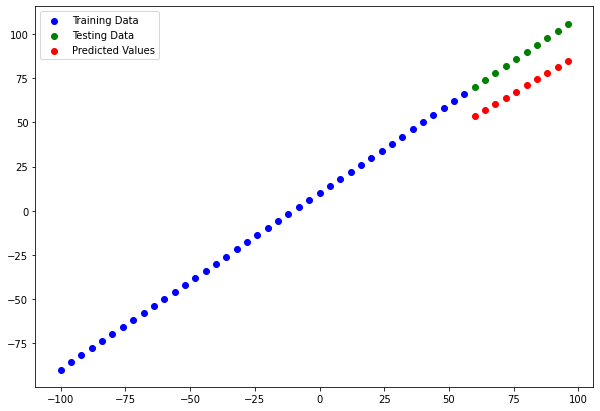

In [13]:
myplotter(x_train= x_training, x_test= x_testing, y_train= y_training, y_test= y_testing, preds= y_preds_1)

In [18]:
mae_1 = mae(y_true=y_testing, y_pred=y_preds_1)
mse_1 = mse(y_true=y_testing, y_pred=y_preds_1)

print(f"Mean Absolute Error = {mae_1}\nMean Squared Error = {mse_1}")

Mean Absolute Error = 18.74532699584961
Mean Squared Error = 353.5733642578125


In [19]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model2.fit(tf.expand_dims(x_training, -1), y_training, epochs=100, verbose=0)

In [20]:
y_preds_2 = model2.predict(x_testing)

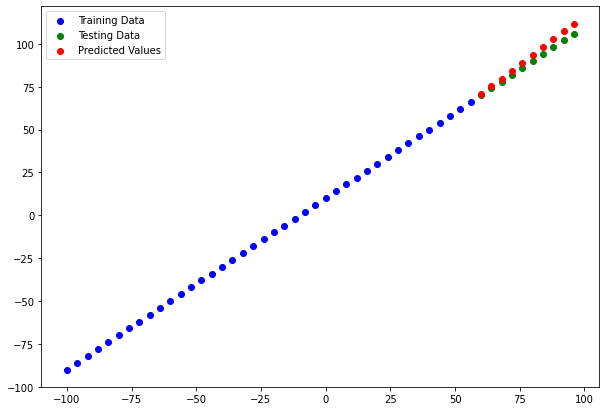

In [26]:
myplotter(x_train= x_training, x_test= x_testing, y_train= y_training, y_test= y_testing, preds= y_preds_2)

In [22]:
mae_2 = mae(y_true=y_testing, y_pred=y_preds_2)
mse_2 = mse(y_true=y_testing, y_pred=y_preds_2)

print(f"Mean Absolute Error = {mae_2}\nMean Squared Error = {mse_2}")

Mean Absolute Error = 3.1969406604766846
Mean Squared Error = 13.07014274597168


In [24]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mse"])

model3.fit(tf.expand_dims(x_training, -1), y_training, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 9ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/500
2/2 [=========================

In [25]:
y_preds_3 = model3.predict(x_testing)

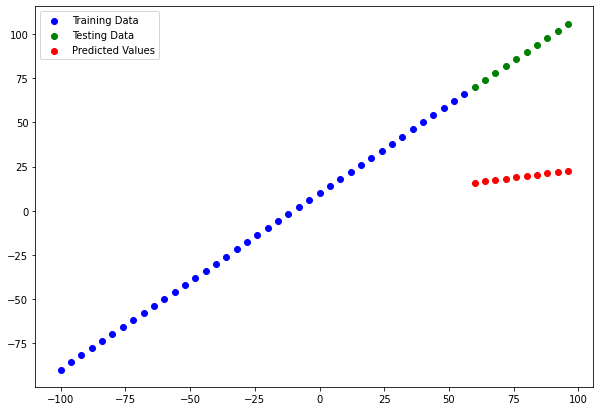

In [27]:
myplotter(x_train= x_training, x_test= x_testing, y_train= y_training, y_test= y_testing, preds= y_preds_3)

In [28]:
mae_3 = mae(y_true=y_testing, y_pred=y_preds_3)
mse_3 = mse(y_true=y_testing, y_pred=y_preds_3)

print(f"Mean Absolute Error = {mae_3}\nMean Squared Error = {mse_3}")

Mean Absolute Error = 68.71361541748047
Mean Squared Error = 4808.02734375


In [29]:
import pandas as pd

model_results = [["model1", mae_1.numpy(), mse_1.numpy()],
                 ["model2", mae_2.numpy(), mse_2.numpy()],
                 ["model3", mae_3.numpy(), mse_3.numpy()]]

tabelled_results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
tabelled_results

,Model,MAE,MSE
0,model1,18.745327,353.573364
1,model2,3.196941,13.070143
2,model3,68.713615,4808.027344


### Conclusion
The comparison of the different models shows that model2 is the best. 
Eventhough model3 is trained more, it had more errors. This is due to the fact that too much training of model would cause overfitting and thus the model won't generalize for new testing data.